In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read in the Clean Datasets:

In [262]:
train_df = pd.read_csv("../datasets/clean_train.csv")
test_df = pd.read_csv("../datasets/clean_test.csv")

### Check the clean data:

***Train***

In [263]:
train_df.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,central_air_dummy,garage_finish_Fin,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,garage_age,age_remod_add
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,0,0,0,1,0,0,1,0,34.0,5
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,0,0,0,1,0,0,1,0,12.0,12
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,0,0,0,1,0,0,0,1,57.0,3
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,0,0,0,1,1,0,0,0,3.0,3
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,0,0,0,1,0,0,0,1,53.0,17


In [264]:
train_df.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,central_air_dummy,garage_finish_Fin,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,garage_age,age_remod_add
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,1,0,34.0,5
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,1,0,12.0,12
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,0,0,1,57.0,3
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,1,1,0,0,0,3.0,3
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,1,53.0,17


***Test***

In [265]:
test_df.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,garage_age,age_remod_add
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,...,0,0,0,0,0,0,1,0,96.0,56
1,1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,...,0,0,0,0,0,0,1,0,29.0,29
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,...,0,0,0,0,0,0,1,0,0.0,0
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,...,0,0,0,0,0,0,1,0,72.0,1
4,4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,...,0,0,0,0,0,0,1,0,46.0,46


In [266]:
test_df.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,garage_age,age_remod_add
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,1,0,96.0,56
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,29.0,29
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,0.0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,1,0,72.0,1
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,46.0,46


# Additional Cleaning for Additional Features:

In [267]:
def categ_check_replace_nan(df, lst):
    for i in range(len(lst)):
        if df[lst[i]].dtype == "int64":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna(0, inplace=True)
        elif df[lst[i]].dtype == "float64":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna(0, inplace=True)
        elif df[lst[i]].dtype == "O":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna("NA", inplace=True)
    return df

***Garage Variables:***

In [270]:
# Each garage column has the same # of nan, and same # of NA values
# Need to check to make sure these are all the same rows to be safe, before impute.

# train_df["garage_finish"].isna().equals(train_df["garage_cond"].isna()) # type & finish good to impute

In [271]:
# Got some help from: https://stackoverflow.com/questions/53842083/extract-column-names-based-on-key-words-pandas-df
garage_list = list(train_df.columns[train_df.columns.str.contains("garage")])

In [272]:
categ_check_replace_nan(train_df, garage_list)
categ_check_replace_nan(test_df, garage_list)

KeyError: 'garage_finish_Fin'

***Bsmt Variables***

In [ ]:
bsmt_list = list(train_df.columns[train_df.columns.str.contains("bsmt")])

In [ ]:
categ_check_replace_nan(train_df, bsmt_list)
categ_check_replace_nan(test_df, bsmt_list)

# Feature Engineering

### Dummies:

***Conditions 1 & 2***

In [ ]:
train_df = pd.get_dummies(train_df, columns=["condition_1", "condition_2"])
test_df = pd.get_dummies(test_df, columns=["condition_1", "condition_2"])

***Garage Finish***

In [252]:
train_df = pd.get_dummies(train_df, columns=["garage_finish"])
test_df = pd.get_dummies(test_df, columns=["garage_finish"])

***Neighborhoods***

In [290]:
train_df = pd.get_dummies(train_df, columns=["neighborhood"])
# test_df = pd.get_dummies(test_df, columns=["neighborhood"])

KeyError: "None of [Index(['neighborhood'], dtype='object')] are in the [columns]"

### Binarize:

***Central Air***

In [238]:
# For Train
train_df["central_air_dummy"] = [1 if i == "Y" else 0 for i in train_df["central_air"]]
train_df["central_air_dummy"].value_counts()

1    1908
0     141
Name: central_air_dummy, dtype: int64

### Engineer Columns

In [236]:
train_df["garage_age"] = train_df["yr_sold"] - train_df["garage_yr_blt"]
train_df["age_remod_add"] = train_df["yr_sold"] - train_df["year_remod/add"]

In [244]:
test_df["garage_age"] = test_df["yr_sold"] - test_df["garage_yr_blt"]
test_df["age_remod_add"] = test_df["yr_sold"] - test_df["year_remod/add"]

# Save Clean CSVs:

In [245]:
train_df.to_csv("../datasets/clean_train.csv")
test_df.to_csv("../datasets/clean_test.csv")

***Correlation & Heatmap based on current numeric columns***

In [246]:
train_df.corr()["sale_price"]

id                  -0.051360
pid                 -0.254465
ms_subclass         -0.087881
lot_frontage         0.342987
lot_area             0.296312
                       ...   
garage_finish_NA    -0.231298
garage_finish_RFn    0.184197
garage_finish_Unf   -0.432043
garage_age          -0.259213
age_remod_add       -0.551502
Name: sale_price, Length: 64, dtype: float64

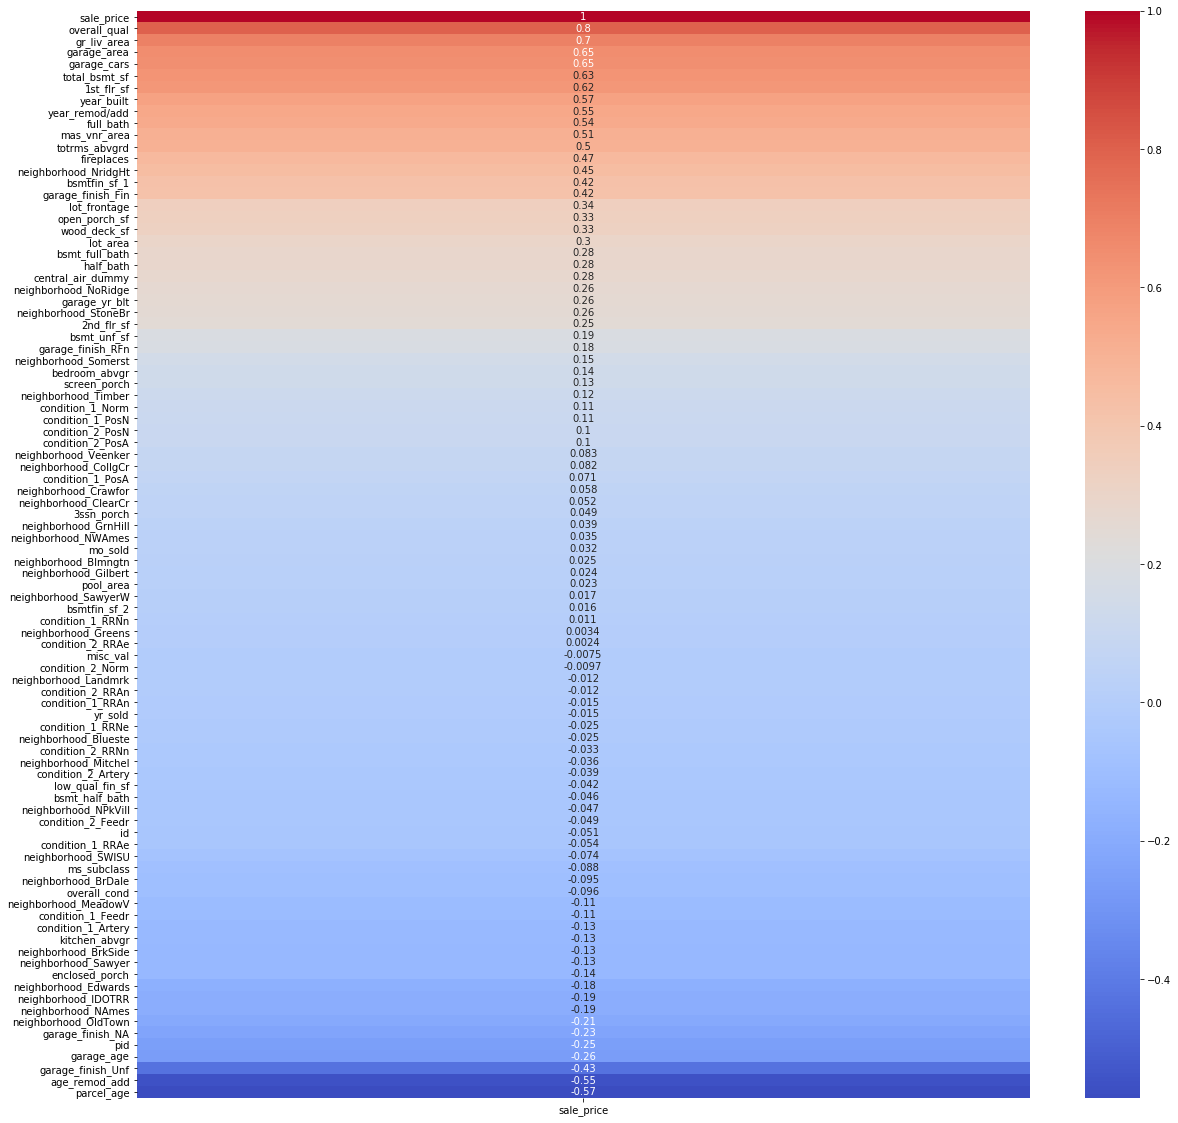

In [291]:
plt.figure(figsize=(20, 20))

sns.heatmap(train_df.corr()[
           ["sale_price"]].sort_values(by=["sale_price"], ascending=False),
           cmap="coolwarm",
           annot=True);